# Rabbits and foxes

There are initially 400 rabbits and 200 foxes on a farm (but it could be two cell types in a 96 well plate or something, if you prefer bio-engineering analogies). Plot the concentration of foxes and rabbits as a function of time for a period of up to 600 days. The predator-prey relationships are given by the following set of coupled ordinary differential equations:

\begin{align}
\frac{dR}{dt} &= k_1 R - k_2 R F \tag{1}\\
\frac{dF}{dt} &= k_3 R F - k_4 F \tag{2}\\
\end{align}

* Constant for growth of rabbits $k_1 = 0.015$ day<sup>-1</sup>
* Constant for death of rabbits being eaten by foxes $k_2 = 0.00004$ day<sup>-1</sup> foxes<sup>-1</sup>
* Constant for growth of foxes after eating rabbits $k_3 = 0.0004$ day<sup>-1</sup> rabbits<sup>-1</sup>
* Constant for death of foxes $k_4 = 0.04$ day<sup>-1</sup>

*This problem is based on one from Chapter 1 of H. Scott Fogler's textbook "Essentials of Chemical Reaction Engineering".*


In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

# Now let's try some Kinetic Monte Carlo

We wish to implement a Kinetic Monte Carlo algorithm to simulate the same situation. See https://en.wikipedia.org/wiki/Kinetic_Monte_Carlo for details.

We'll assume the numbers of rabbits and foxes (starting at 400 and 200) are actual rabbits and foxes, not "rabbit densities" for example, and so must always remain integers: you can't have half a rabbit or half a fox.

There are four events, with rates that are straightforward to calculate, so the rejection-free algorithm is suitable:
* `rabbit_birth = k1 * rabbits`
* `rabbit_death = k2 * rabbits * foxes`
* `fox_birth = k3 * rabbits * foxes`
* `fox_death = k4 * foxes`


Use a Kinetic Monte Carlo simulation(s) running for 600 days to determine
1. The expected location of the second peak in foxes (eg. 425 days, 2800 foxes), on occasions that there is one (eg. if there's a peak that's  >200 days and >100 foxes)
2. The interquartile range of the second peak in foxes (eg. 411-443 days, 2700-3120 foxes).
3. The probability that the foxes die out before 600 days are complete

Make sure you've done enough simulations to be suitably confident in your answers (given the precision you think appropriate).

# Your turn!

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

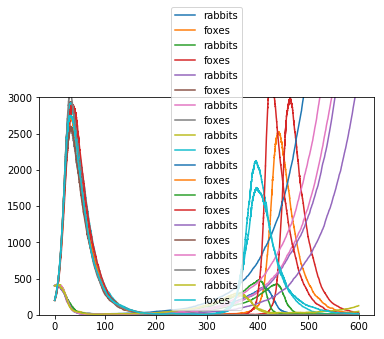

All died 18 times out of 1000 runs or 1.8%
Foxes died 708 times out of 1000 runs or 70.8%


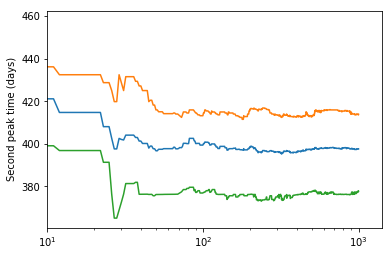

Second peak (days) is 397.64997292810204 with IQR [377.7274613100966-413.90930523316297] 


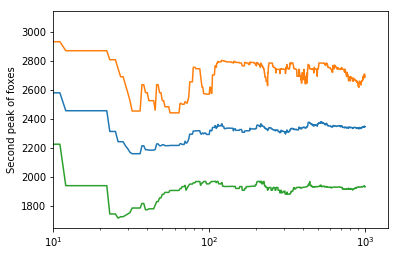

Second peak of foxes is 2347.1640866873063 with IQR [1933.5-2689.5] 


In [18]:
import numpy as np
import matplotlib.pyplot as plt
import random
random.seed(1) 
np.random.seed(1) 
k1 = 0.015
k2 = 0.00004
k3 = 0.0004
k4 = 0.04
end_time=600
def The_rates(rabbits, foxes):
    rabbit_birth = k1 * rabbits 
    rabbit_death = k2 * rabbits * foxes
    fox_birth = k3 * rabbits * foxes 
    fox_death = k4 * foxes
    return (rabbit_birth, rabbit_death, fox_birth, fox_death)

dead_fox = 0
dead_all = 0
runs = 1000
time_peak = []
fox_peak = []
mean_times = np.zeros(runs)
mean_foxes = np.zeros(runs)
upper_quartile_foxes = np.zeros(runs)
lower_quartile_foxes = np.zeros(runs)
upper_quartile_times = np.zeros(runs) 
lower_quartile_times = np.zeros(runs)

for run in range(runs):
    print('.',end='') 
    times = []
    rabbits = []
    foxes = []
    time = 0
    rabbit = 400
    fox = 200
    
    while time < end_time:
        times.append(time)
        rabbits.append(rabbit)
        foxes.append(fox)
        (rabbit_birth, rabbit_death, fox_birth, fox_death) = rates = The_rates(rabbit, fox)
        sum_rates = sum(rates)
        if sum_rates == 0:
            dead_all += 1
            times.append(end_time)
            rabbits.append(rabbit)
            foxes.append(fox)
            break
        step_size = random.expovariate( sum_rates ) 
        time += step_size 
        selected_rate = random.uniform(0, sum_rates)
        if selected_rate<fox_birth:
            fox += 1
            continue
        selected_rate-=fox_birth
        if selected_rate < fox_death:
            fox -=1
            if fox == 0:
                dead_fox += 1
            continue
        selected_rate-=fox_death
        if selected_rate < rabbit_birth:
            rabbit += 1
            continue
        rabbit -= 1
                
    
    times = np.array(times)
    rabbits = np.array(rabbits)
    foxes = np.array(foxes)
    
    peak = np.argmax(foxes*(times>200)*(foxes>100)) 
    if peak:
        time_peak.append(times[peak])
        fox_peak.append(foxes[peak])
    
    if len(time_peak)>0:
        mean_times[run] = np.mean(time_peak)
        mean_foxes[run] = np.mean(fox_peak)
    
        upper_quartile_foxes[run] = np.percentile(fox_peak,75)
        lower_quartile_foxes[run] = np.percentile(fox_peak,25)
        upper_quartile_times[run] = np.percentile(time_peak,75)
        lower_quartile_times[run] = np.percentile(time_peak,25)
    if run < 10:
        plt.plot(times, rabbits, label='rabbits')
        plt.plot(times, foxes, label='foxes')
plt.legend(loc="best")
plt.ylim(0,3000)
plt.show()


print("All died {} times out of {} runs or {}%".format(dead_all, runs, 100*dead_all/runs))
print("Foxes died {} times out of {} runs or {}%".format(dead_fox, runs, 100*dead_fox/runs))

plt.semilogx(mean_times,label='mt')
plt.semilogx(upper_quartile_times,label='uqt')
plt.semilogx(lower_quartile_times,label='lqt')
plt.ylabel('Second peak time (days)')
plt.xlim(10)
plt.show()
print("Second peak (days) is {} with IQR [{}-{}] ".format(mean_times[-1], lower_quartile_times[-1], upper_quartile_times[-1]))


plt.semilogx(mean_foxes,label='mf')
plt.semilogx(upper_quartile_foxes,label='uqf')
plt.semilogx(lower_quartile_foxes,label='lqt')
plt.ylabel('Second peak of foxes')
plt.xlim(10)
plt.show()
print("Second peak of foxes is {} with IQR [{}-{}] ".format(mean_foxes[-1], lower_quartile_foxes[-1], upper_quartile_foxes[-1]))